# Fine-tune `roberta-base` model

In this notebook, we will fine-tune [the `roberta-base` model][1], so that it can represent math-specific tokens.

 [1]: https://huggingface.co/roberta-base

In [1]:
! hostname

mir


In [2]:
%%capture
! pip install .[transformers]

In [3]:
%%capture
! make tuned-roberta-base-text+latex

To validate our model, we will plot the validation loss.

In [4]:
import json
from pathlib import Path

def get_checkpoint_number(input_directory: Path) -> int:
    checkpoint_number = int(input_directory.name.split('-')[1])
    return checkpoint_number

checkpoints = Path('tuned-roberta-base-text+latex.MLM-objective').glob('*/')
latest_checkpoint = max(checkpoints, key=get_checkpoint_number)
with (latest_checkpoint / 'trainer_state.json').open('rt') as f:
    trainer_state = json.load(f)

train_losses = []
validation_losses = []

for log in trainer_state['log_history']:
    step = int(log['step'])
    if 'loss' in log:
        loss = float(log['loss'])
        train_losses.append((step, loss))
    if 'eval_loss' in log:
        eval_loss = float(log['eval_loss'])
        validation_losses.append((step, eval_loss))

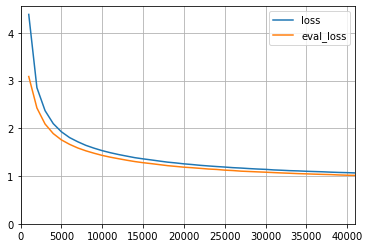

In [5]:
from typing import Tuple

import matplotlib.pyplot as plt

plt.plot(*zip(*train_losses), label='loss')
plt.plot(*zip(*validation_losses), label='eval_loss')
plt.grid()
plt.xlim((0, step))
plt.ylim((0, None))
_ = plt.legend()